<a href="https://colab.research.google.com/github/Nehasatheesh04/Image_and_video_processing_Lab/blob/main/DIP_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB CYCLE 1


In [ ]:

!pip install opencv-python-headless matplotlib


In [5]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os


Q1

In [16]:
# Upload an image
uploaded = files.upload()

# Get filename
image_filename = list(uploaded.keys())[0]
print(f"\nUploaded File: {image_filename}")


Saving image.png to image.png

Uploaded File: image.png


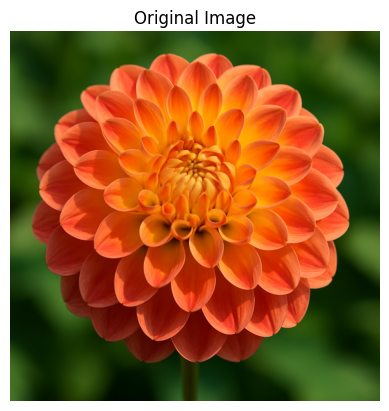

In [17]:
#a: Read the image
image = cv2.imread(image_filename)

# Convert from BGR (OpenCV default) to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [ ]:
#b: Get image information
height, width, channels = image.shape
image_size = os.path.getsize(image_filename)

print("Image Information:")
print(f"Dimensions     : {width} x {height}")
print(f"Channels       : {channels}")
print(f"File Size      : {image_size / 1024:.2f} KB")


Image Information:
Dimensions     : 1024 x 1024
Channels       : 3
File Size      : 1387.38 KB


In [ ]:
# c: Save compressed copy (JPEG) and find compression ratio
compressed_filename = "compressed_image.jpg"
cv2.imwrite(compressed_filename, image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])  # 50% quality

compressed_size = os.path.getsize(compressed_filename)

compression_ratio = image_size / compressed_size
print(f"Compressed Size: {compressed_size / 1024:.2f} KB")
print(f"Compression Ratio (Original/Compressed): {compression_ratio:.2f}")


Compressed Size: 57.57 KB
Compression Ratio (Original/Compressed): 24.10


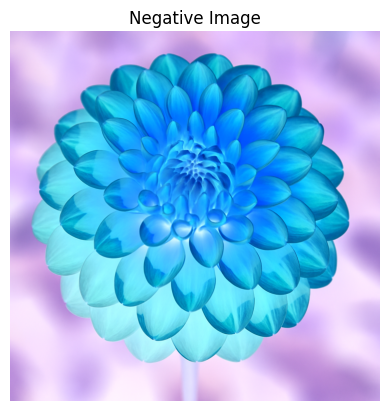

In [18]:
# Step 4d: Display negative of the image
negative_image = 255 - image
negative_rgb = cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB)

plt.imshow(negative_rgb)
plt.title("Negative Image")
plt.axis("off")
plt.show()


Q2


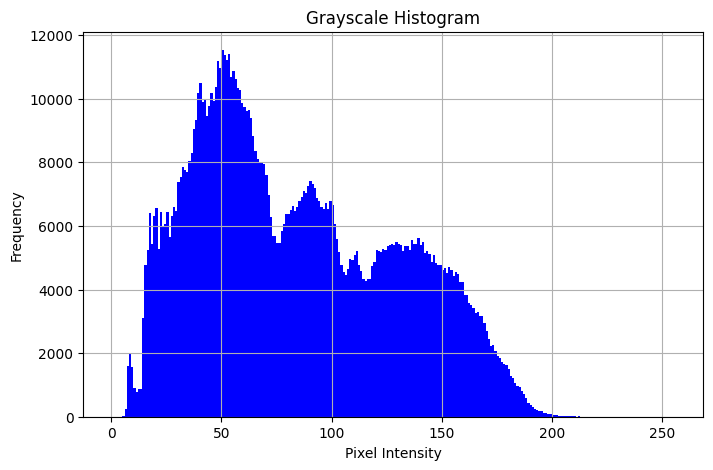

In [20]:
# Load image in grayscale
gray_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Plot grayscale histogram
plt.figure(figsize=(8, 5))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='blue')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Q3

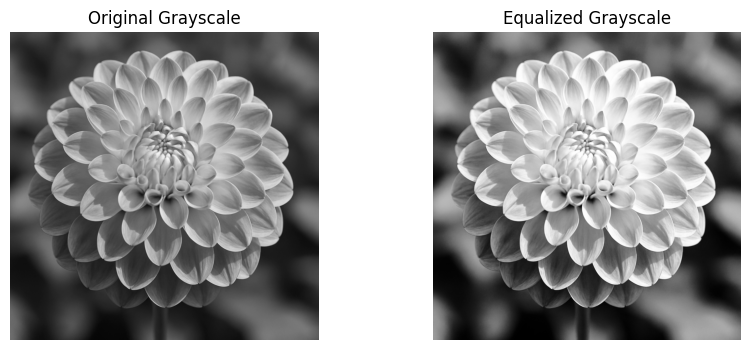

In [ ]:
# Load the image in grayscale
gray_image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_gray = cv2.equalizeHist(gray_image)

# Display original vs equalized grayscale image
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_gray, cmap='gray')
plt.title("Equalized Grayscale")
plt.axis('off')

plt.show()


Q4

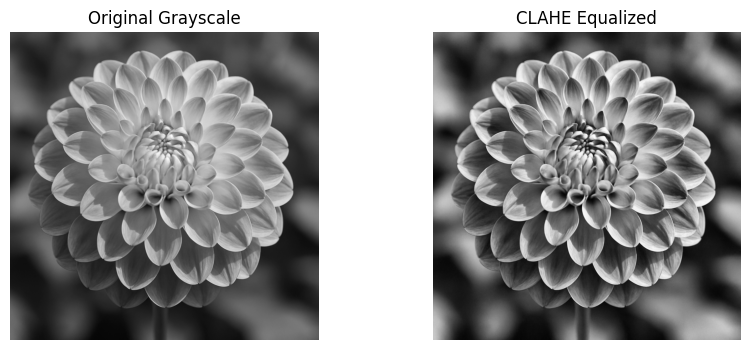

In [ ]:
# Read the image in grayscale
gray_img = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)

# Create CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
clahe_img = clahe.apply(gray_img)

# Display original vs CLAHE
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE Equalized")
plt.axis('off')

plt.show()


Q5


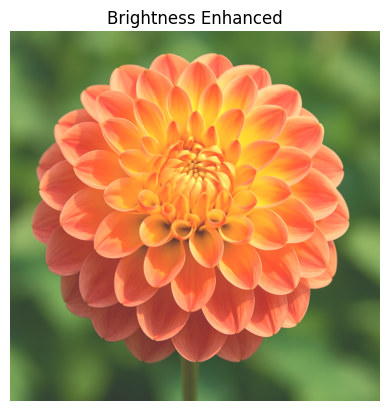

In [ ]:
# Increase brightness by adding a constant
bright = cv2.convertScaleAbs(image_rgb, alpha=1.0, beta=50)

plt.imshow(bright)
plt.title("Brightness Enhanced")
plt.axis('off')
plt.show()


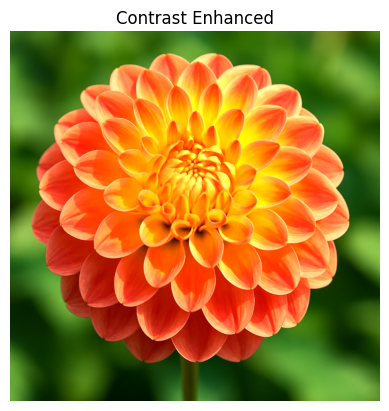

In [ ]:
# Increase contrast using alpha
contrast = cv2.convertScaleAbs(image_rgb, alpha=1.5, beta=0)

plt.imshow(contrast)
plt.title("Contrast Enhanced")
plt.axis('off')
plt.show()


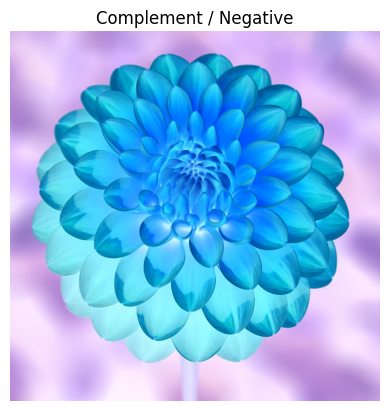

In [ ]:
complement = 255 - image_rgb

plt.imshow(complement)
plt.title("Complement / Negative")
plt.axis('off')
plt.show()


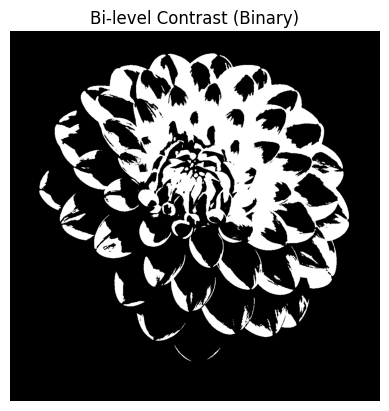

In [ ]:
# Convert grayscale image to binary using thresholding
_, binary = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Bi-level Contrast (Binary)")
plt.axis('off')
plt.show()


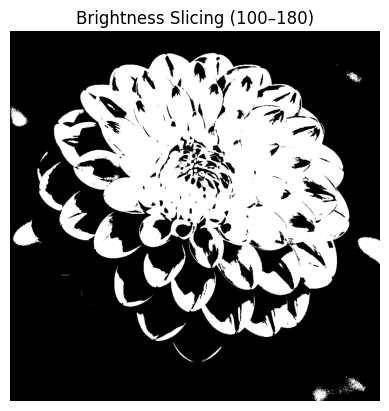

In [ ]:
# Highlight a specific brightness range, rest set to black
sliced = np.zeros_like(gray_image)
sliced[(gray_image > 100) & (gray_image < 180)] = 255

plt.imshow(sliced, cmap='gray')
plt.title("Brightness Slicing (100–180)")
plt.axis('off')
plt.show()


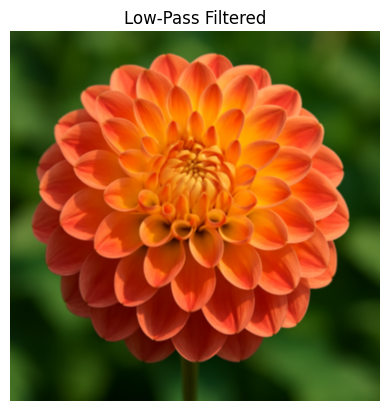

In [ ]:
# Apply a 5x5 averaging filter
lowpass = cv2.blur(image_rgb, (5, 5))

plt.imshow(lowpass)
plt.title("Low-Pass Filtered")
plt.axis('off')
plt.show()


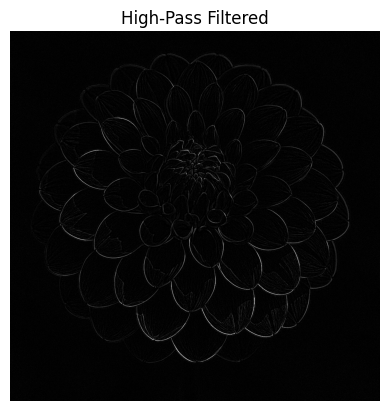

In [ ]:
# Use a kernel for high-pass filtering (edge detection)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

highpass = cv2.filter2D(gray_image, -1, kernel)

plt.imshow(highpass, cmap='gray')
plt.title("High-Pass Filtered")
plt.axis('off')
plt.show()


Q6

In [ ]:
# Upload an image
uploaded = files.upload()
image_filename = list(uploaded.keys())[0]

# Load image in color (RGB for display)
img = cv2.imread(image_filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
(h, w) = img.shape[:2]


Saving image.png to image (1).png


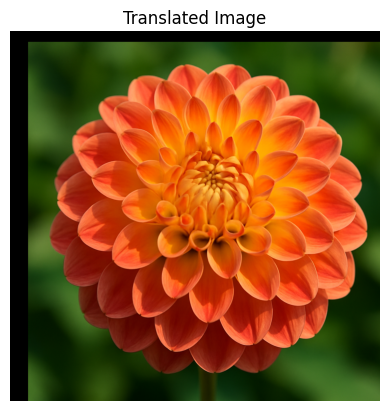

In [ ]:
# Translate the image right by 50 and down by 30 pixels
tx, ty = 50, 30
M = np.float32([[1, 0, tx],
                [0, 1, ty]])

translated = cv2.warpAffine(img_rgb, M, (w, h))

plt.imshow(translated)
plt.title("Translated Image")
plt.axis('off')
plt.show()


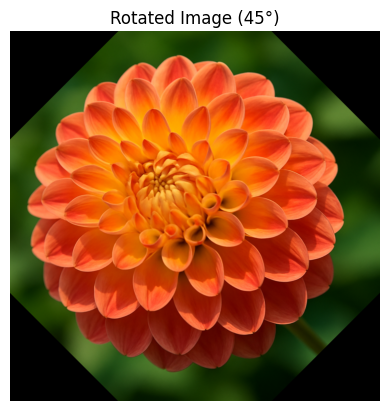

In [ ]:
# Rotate image around its center by 45 degrees
angle = 45
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, scale=1.0)

rotated = cv2.warpAffine(img_rgb, M, (w, h))

plt.imshow(rotated)
plt.title("Rotated Image (45°)")
plt.axis('off')
plt.show()


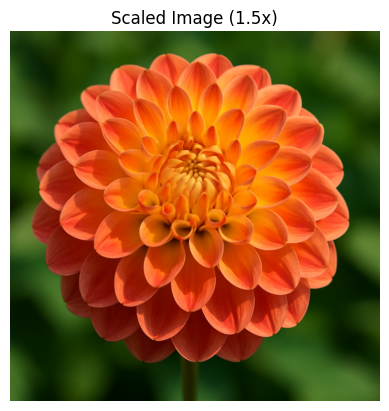

In [ ]:
# Scale image by 1.5x (zoom in)
scaled = cv2.resize(img_rgb, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

plt.imshow(scaled)
plt.title("Scaled Image (1.5x)")
plt.axis('off')
plt.show()


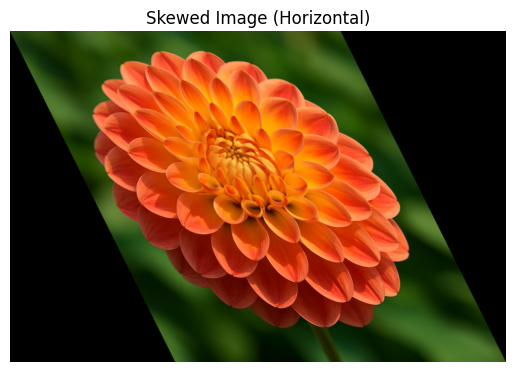

In [ ]:
# Horizontal skew (shear)
# Matrix: [[1, shear_x, 0], [0, 1, 0]]
shear_x = 0.5
M = np.float32([[1, shear_x, 0],
                [0,     1,   0]])

new_w = int(w + shear_x * h)
skewed = cv2.warpAffine(img_rgb, M, (new_w, h))

plt.imshow(skewed)
plt.title("Skewed Image (Horizontal)")
plt.axis('off')
plt.show()


LAB CYCLE 2

Q1


In [ ]:
# Upload two images of the same size
print("Upload Image 1:")
uploaded1 = files.upload()
img1_path = list(uploaded1.keys())[0]

print("Upload Image 2:")
uploaded2 = files.upload()
img2_path = list(uploaded2.keys())[0]


Upload Image 1:


Saving image1_gradient.jpg to image1_gradient.jpg
Upload Image 2:


Saving image2_circle.jpg to image2_circle.jpg


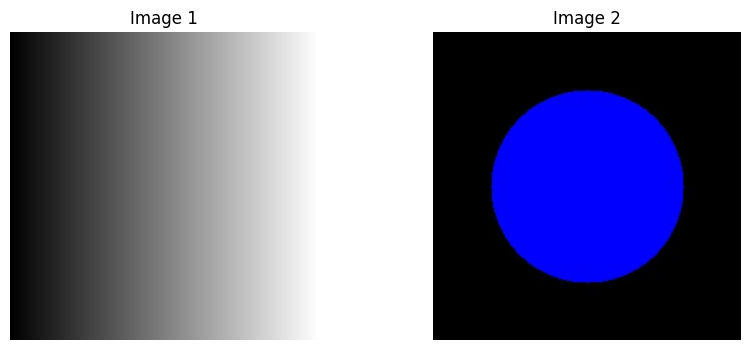

In [ ]:
# Read both images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Resize img2 to match img1 if needed
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convert from BGR to RGB for display
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Display the two images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.imshow(img1_rgb); plt.title("Image 1"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(img2_rgb); plt.title("Image 2"); plt.axis("off")
plt.show()


In [ ]:
# Addition
added = cv2.add(img1, img2)

# Subtraction
subtracted = cv2.subtract(img1, img2)

# Multiplication
multiplied = cv2.multiply(img1, img2)

# Division (avoid divide-by-zero)
img2_float = img2.astype(np.float32) + 1e-5  # add epsilon to avoid division by zero
divided = cv2.divide(img1.astype(np.float32), img2_float)
divided = np.clip(divided * 255.0 / np.max(divided), 0, 255).astype(np.uint8)


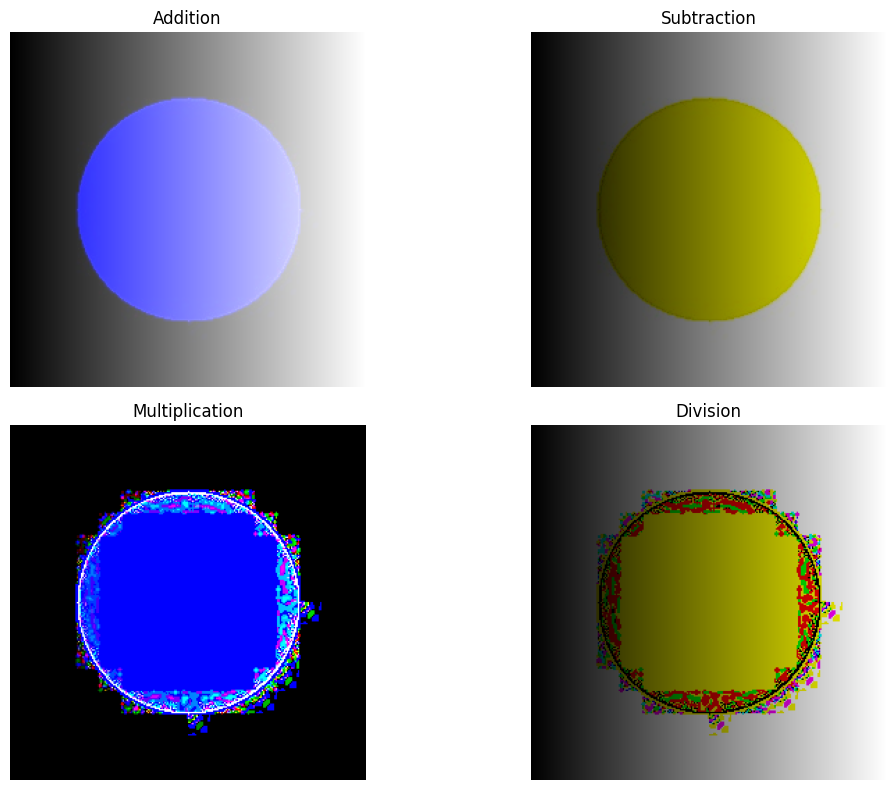

In [ ]:
titles = ['Addition', 'Subtraction', 'Multiplication', 'Division']
images = [added, subtracted, multiplied, divided]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Q2

In [ ]:
print("📁 Upload a noisy image:")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

📁 Upload a noisy image:


Saving noisy_image.jpg to noisy_image.jpg


In [ ]:

#  Read image in grayscale
noisy_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
#  Averaging counts
counts = [2, 8, 16, 32, 128]
averaged_images = []

#  Denoise using averaging
for count in counts:
    acc = np.zeros_like(noisy_image, dtype=np.float32)
    for _ in range(count):
        noise = np.random.normal(0, 25, noisy_image.shape)
        acc += np.clip(noisy_image + noise, 0, 255)
    averaged = (acc / count).astype(np.uint8)
    averaged_images.append(averaged)


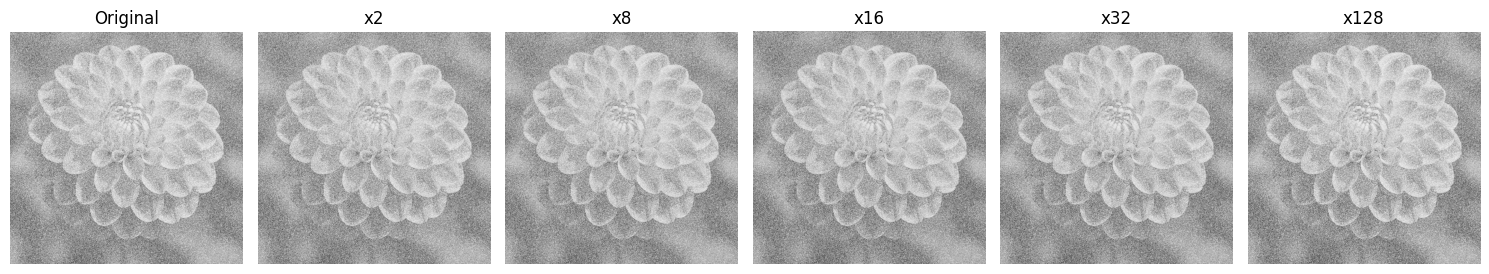

In [ ]:
# Display results
plt.figure(figsize=(15, 6))
plt.subplot(1, len(counts) + 1, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, img in enumerate(averaged_images):
    plt.subplot(1, len(counts) + 1, i + 2)
    plt.imshow(img, cmap='gray')
    plt.title(f"x{counts[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Q3

📁 Upload an image:


Saving image.png to image (2).png


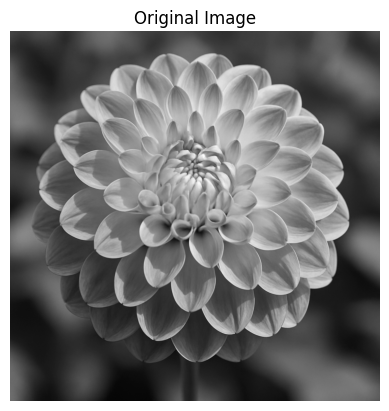

In [ ]:
# === Step 1: Upload an image ===
print("📁 Upload an image:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# === Step 2: Load image in grayscale ===
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("❌ Could not load image.")
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
# Mean (averaging) filter
def apply_mean_filter(image, ksize=3):
    return cv2.blur(image, (ksize, ksize))

# Box filter (optionally normalized)
def apply_box_filter(image, ksize=3, normalize=True):
    return cv2.boxFilter(image, -1, (ksize, ksize), normalize=normalize)

# Gaussian filter
def apply_gaussian_filter(image, ksize=3, sigma=1):
    return cv2.GaussianBlur(image, (ksize, ksize), sigma)

# Laplacian filter (for edge enhancement)
def apply_laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F).astype(np.uint8)

# Sobel filters
def apply_sobel_filter(image, axis='x', ksize=3):
    dx, dy = (1, 0) if axis == 'x' else (0, 1)
    return cv2.Sobel(image, cv2.CV_64F, dx, dy, ksize=ksize).astype(np.uint8)


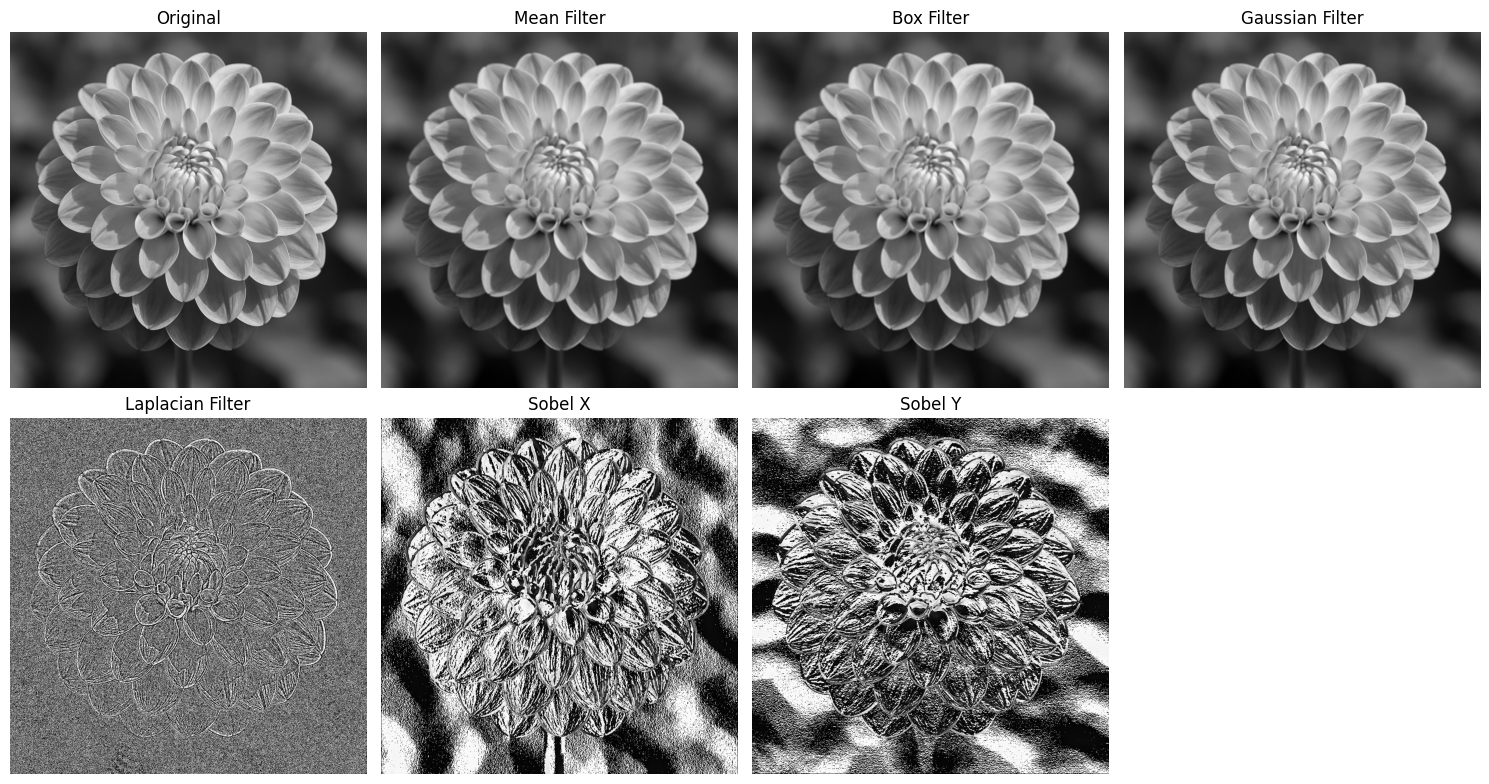

In [ ]:
# Apply filters
mean_img = apply_mean_filter(img, 5)
box_img = apply_box_filter(img, 5)
gaussian_img = apply_gaussian_filter(img, 5)
laplacian_img = apply_laplacian_filter(img)
sobel_x_img = apply_sobel_filter(img, 'x')
sobel_y_img = apply_sobel_filter(img, 'y')

# Display all filtered images
titles = [
    "Original", "Mean Filter", "Box Filter", "Gaussian Filter",
    "Laplacian Filter", "Sobel X", "Sobel Y"
]
images = [
    img, mean_img, box_img, gaussian_img,
    laplacian_img, sobel_x_img, sobel_y_img
]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Q4

In [6]:
print("📁 Upload a grayscale image:")
image_upload = files.upload()
image_path = list(image_upload.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

📁 Upload a grayscale image:


Saving grayscale_image.jpg to grayscale_image.jpg


In [7]:
print("📁 Upload avg3.txt, avg7.txt, and avg11.txt:")
kernel_uploads = files.upload()
kernel_paths = list(kernel_uploads.keys())


📁 Upload avg3.txt, avg7.txt, and avg11.txt:


Saving avg7.txt to avg7.txt
Saving avg11.txt to avg11.txt
Saving avg3.txt to avg3.txt


In [11]:
def load_kernel_from_txt(path):
    with open(path, 'r') as f:
        kernel = [list(map(float, line.strip().split())) for line in f]
    return np.array(kernel, dtype=np.float32)


In [9]:
def apply_convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def apply_correlation(image, kernel):
    flipped = cv2.flip(kernel, -1)
    return cv2.filter2D(image, -1, flipped)


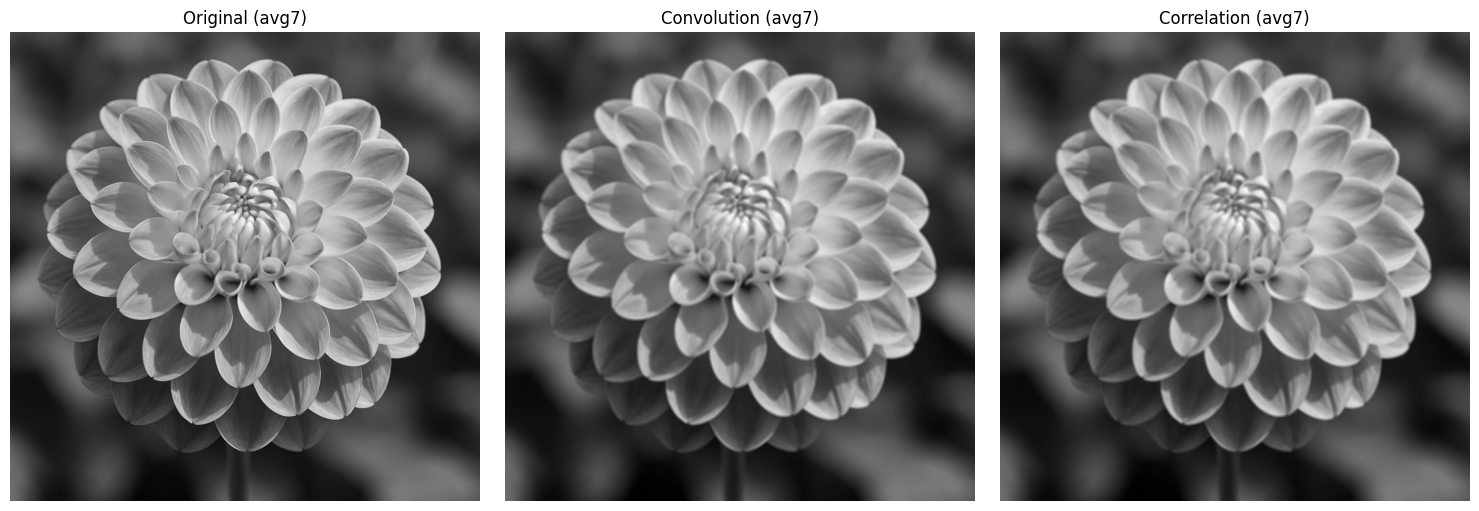

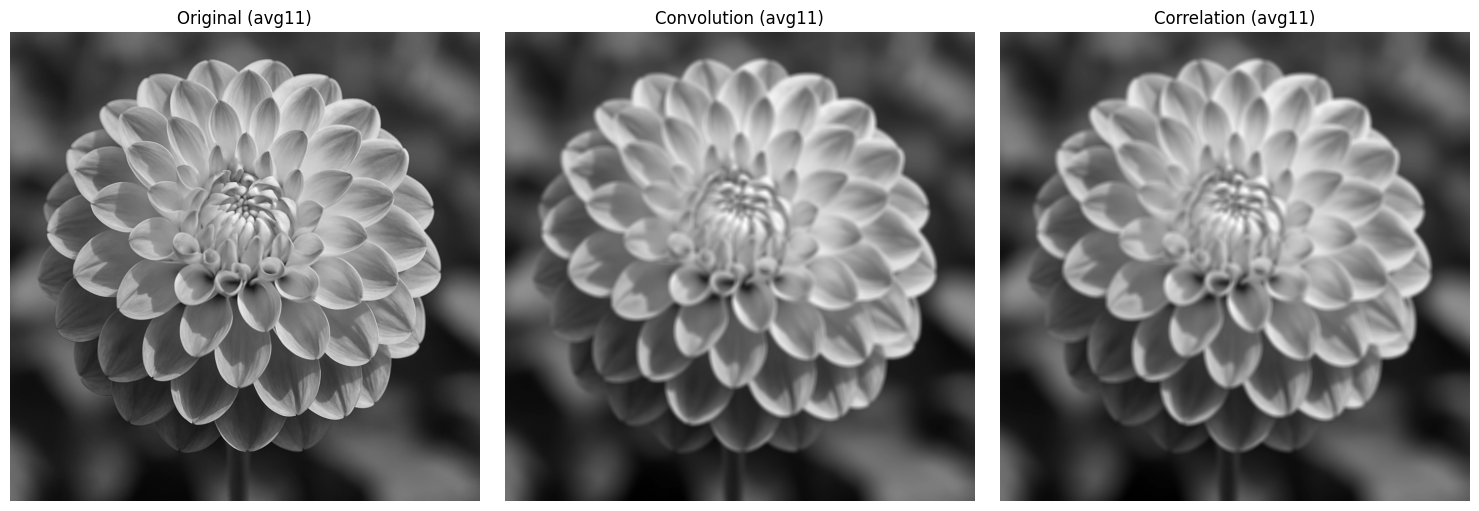

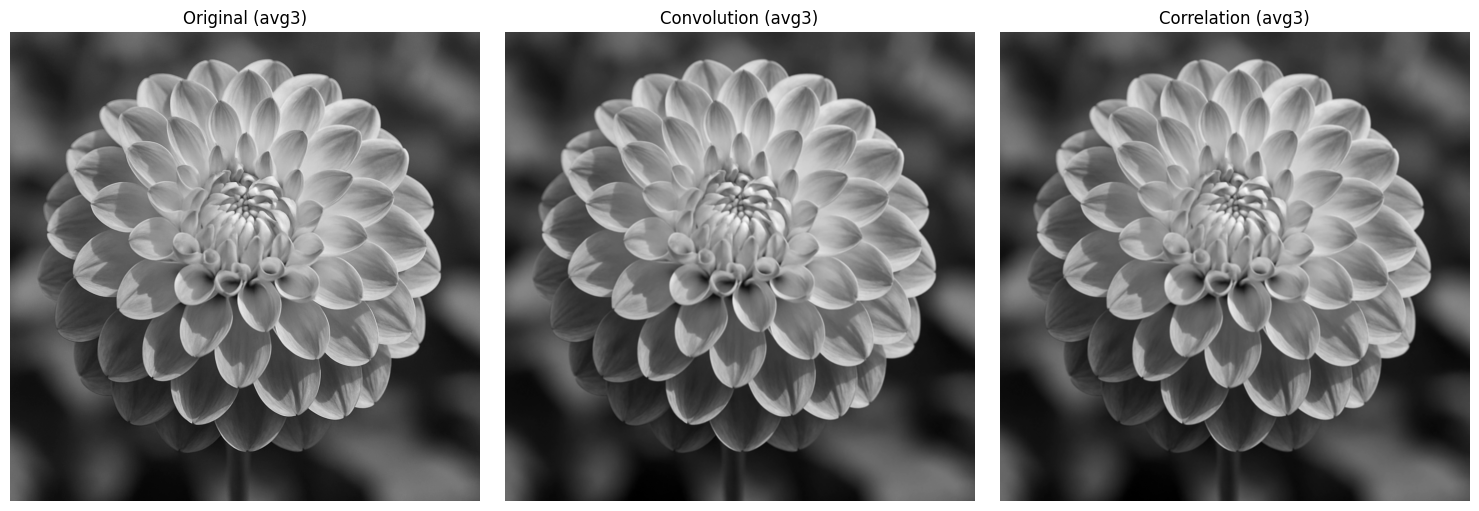

In [13]:
# Load the kernels
kernels = {}
for kernel_path in kernel_paths:
    kernel_name = os.path.splitext(os.path.basename(kernel_path))[0]
    kernels[kernel_name] = load_kernel_from_txt(kernel_path)

# Apply operations for each kernel
for kernel_name, kernel in kernels.items():
    convolved_img = apply_convolution(img, kernel)
    correlated_img = apply_correlation(img, kernel)

    # Display images
    titles = [f"Original ({kernel_name})", f"Convolution ({kernel_name})", f"Correlation ({kernel_name})"]
    images = [img, convolved_img, correlated_img]

    plt.figure(figsize=(15, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()